In [1]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch
import numpy as np
import os, time, random
import argparse
from torch.utils.data import Dataset, DataLoader
from PIL import Image as PILImage

from model.model import InvISPNet
from dataset.de_dataset import deDataset
from config.config import get_arguments

from tqdm import tqdm
import cv2
import imageio
from skimage.measure import compare_psnr, compare_ssim, compare_mse, shannon_entropy,compare_nrmse
from matplotlib import pyplot as plt
import math
import scipy.io as io

In [2]:
os.system('nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp')
os.environ['CUDA_VISIBLE_DEVICES'] = str(np.argmax([int(x.split()[2]) for x in open('tmp', 'r').readlines()]))
os.system('rm tmp')

parser = get_arguments()
parser.add_argument("--ckpt", type=str, default="./exps/train/checkpoint/0015.pth", help="Checkpoint path.") 
parser.add_argument("--out_path", type=str, default="./exps/", help="Path to save results. ")
parser.add_argument("--dataset", type=str, default="Ncd", help="dataset name. ")

# args = parser.parse_args()
args, unknown = parser.parse_known_args()
# print("Parsed arguments: {}".format(args))

In [3]:
net = InvISPNet(channel_in=3, channel_out=3, block_num=8)
device = torch.device("cuda:0")

net.to(device)
net.eval()
# load the pretrained weight if there exists one
if os.path.isfile(args.ckpt):
    net.load_state_dict(torch.load(args.ckpt), strict=False)
    print("[INFO] Loaded checkpoint: {}".format(args.ckpt))
else:
    assert 0

print("[INFO] Start data load and preprocessing") 

Dataset = deDataset(opt=args,root1='./data/test/color',root2='./data/test/gray')
dataloader = DataLoader(Dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)

PSNR=[]
PSNR_REV=[]

SSIM=[]
SSIM_REV=[]

[INFO] Loaded checkpoint: ./exps/train/checkpoint/0015.pth
[INFO] Start data load and preprocessing


[INFO] Start test...


  0%|          | 0/31 [00:00<?, ?it/s]

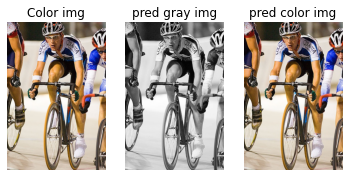

  3%|▎         | 1/31 [00:00<00:23,  1.30it/s]

[INFO] Epoch time:  0.6507613658905029 task:  test


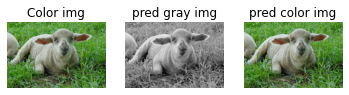

  6%|▋         | 2/31 [00:01<00:20,  1.40it/s]

[INFO] Epoch time:  0.6638803482055664 task:  test


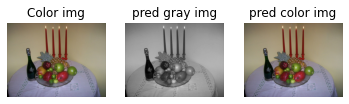

 10%|▉         | 3/31 [00:02<00:19,  1.45it/s]

[INFO] Epoch time:  0.6503570079803467 task:  test


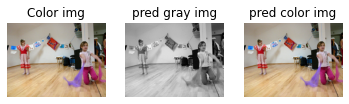

 13%|█▎        | 4/31 [00:02<00:18,  1.47it/s]

[INFO] Epoch time:  0.6545281410217285 task:  test


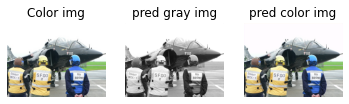

 16%|█▌        | 5/31 [00:03<00:17,  1.49it/s]

[INFO] Epoch time:  0.6515536308288574 task:  test


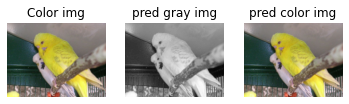

 19%|█▉        | 6/31 [00:04<00:16,  1.49it/s]

[INFO] Epoch time:  0.662926435470581 task:  test


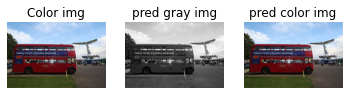

 23%|██▎       | 7/31 [00:04<00:15,  1.53it/s]

[INFO] Epoch time:  0.6081752777099609 task:  test


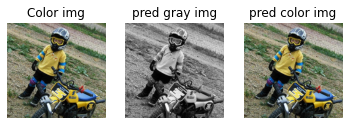

 26%|██▌       | 8/31 [00:05<00:15,  1.49it/s]

[INFO] Epoch time:  0.696242094039917 task:  test


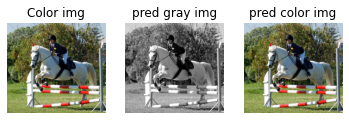

 29%|██▉       | 9/31 [00:06<00:15,  1.46it/s]

[INFO] Epoch time:  0.6969485282897949 task:  test


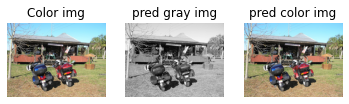

 32%|███▏      | 10/31 [00:06<00:14,  1.42it/s]

[INFO] Epoch time:  0.7472703456878662 task:  test


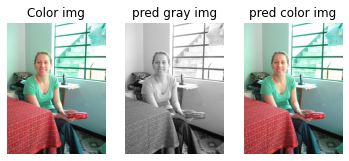

 35%|███▌      | 11/31 [00:07<00:13,  1.45it/s]

[INFO] Epoch time:  0.6485636234283447 task:  test


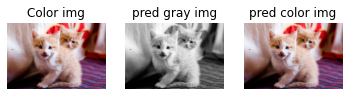

 39%|███▊      | 12/31 [00:08<00:12,  1.50it/s]

[INFO] Epoch time:  0.606677770614624 task:  test


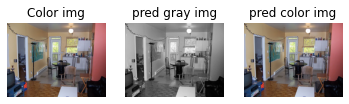

 42%|████▏     | 13/31 [00:08<00:11,  1.50it/s]

[INFO] Epoch time:  0.6479356288909912 task:  test


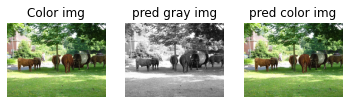

 45%|████▌     | 14/31 [00:09<00:11,  1.50it/s]

[INFO] Epoch time:  0.6544909477233887 task:  test


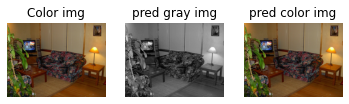

 48%|████▊     | 15/31 [00:10<00:10,  1.51it/s]

[INFO] Epoch time:  0.6501181125640869 task:  test


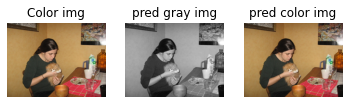

 52%|█████▏    | 16/31 [00:10<00:10,  1.49it/s]

[INFO] Epoch time:  0.6842236518859863 task:  test


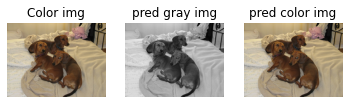

 55%|█████▍    | 17/31 [00:11<00:09,  1.48it/s]

[INFO] Epoch time:  0.6655941009521484 task:  test


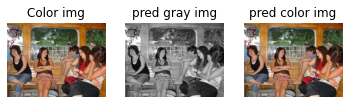

 58%|█████▊    | 18/31 [00:12<00:08,  1.50it/s]

[INFO] Epoch time:  0.6418883800506592 task:  test


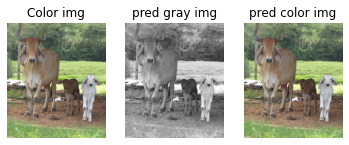

 61%|██████▏   | 19/31 [00:12<00:08,  1.40it/s]

[INFO] Epoch time:  0.806476354598999 task:  test


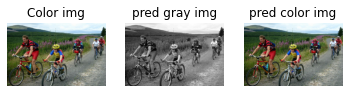

 65%|██████▍   | 20/31 [00:13<00:07,  1.47it/s]

[INFO] Epoch time:  0.6010980606079102 task:  test


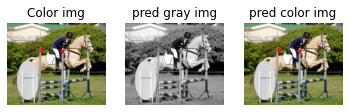

 68%|██████▊   | 21/31 [00:14<00:06,  1.48it/s]

[INFO] Epoch time:  0.6485660076141357 task:  test


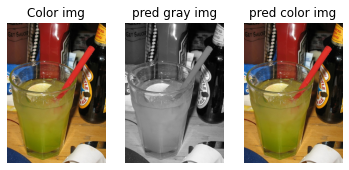

 71%|███████   | 22/31 [00:14<00:05,  1.51it/s]

[INFO] Epoch time:  0.6292035579681396 task:  test


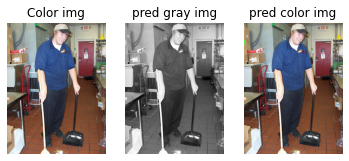

 74%|███████▍  | 23/31 [00:15<00:05,  1.51it/s]

[INFO] Epoch time:  0.6464188098907471 task:  test


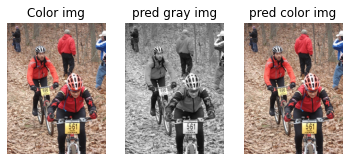

 77%|███████▋  | 24/31 [00:16<00:04,  1.51it/s]

[INFO] Epoch time:  0.6588156223297119 task:  test


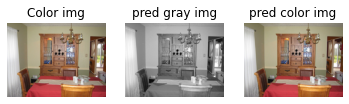

 81%|████████  | 25/31 [00:16<00:03,  1.51it/s]

[INFO] Epoch time:  0.6476233005523682 task:  test


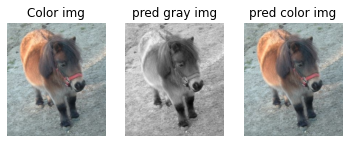

 84%|████████▍ | 26/31 [00:17<00:02,  1.68it/s]

[INFO] Epoch time:  0.43712425231933594 task:  test


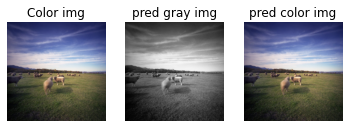

 87%|████████▋ | 27/31 [00:18<00:02,  1.45it/s]

[INFO] Epoch time:  0.8974499702453613 task:  test


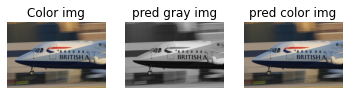

 90%|█████████ | 28/31 [00:18<00:02,  1.49it/s]

[INFO] Epoch time:  0.6137783527374268 task:  test


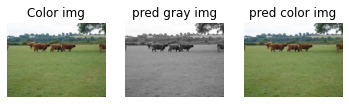

 94%|█████████▎| 29/31 [00:19<00:01,  1.50it/s]

[INFO] Epoch time:  0.6515254974365234 task:  test


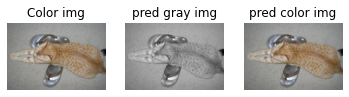

 97%|█████████▋| 30/31 [00:20<00:00,  1.53it/s]

[INFO] Epoch time:  0.60825514793396 task:  test


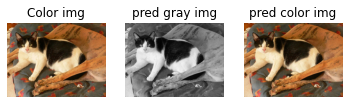

100%|██████████| 31/31 [00:20<00:00,  1.49it/s]

[INFO] Epoch time:  0.6448614597320557 task:  test
ave_psnr 45.648412954207714
ave_psnr_rev 64.77082270876811
ave_ssim 0.9981630534384439
ave_ssim_rev 0.999807407279188


In [4]:
print("[INFO] Start test...") 
for i_batch, sample_batched in enumerate(tqdm(dataloader)):
    step_time = time.time() 

    input, target_forward, input_target = sample_batched['input_ch'].to(device), sample_batched['target_forward_img'].to(device), \
                        sample_batched['input_target_img'].to(device)

    file_name = sample_batched['file_name'][0]        


    with torch.no_grad():
        reconstruct_for = net(input)
        reconstruct_for = torch.clamp(reconstruct_for, 0, 1)

        reconstruct_rev = net(reconstruct_for, rev=True)

    pred_rev = reconstruct_rev.detach().permute(0,2,3,1).squeeze()  
    pred_rev = torch.clamp(pred_rev, 0, 1).cpu().numpy() 
    
    pred_img = reconstruct_for.detach().permute(0,2,3,1).squeeze().cpu().numpy()   
    target_forward_img = target_forward.permute(0,2,3,1).squeeze().cpu().numpy() 
    
    pred_for = ( pred_img[:,:,0] + pred_img[:,:,1] + pred_img[:,:,2] ) / 3.0
    target_forward_patch = ( target_forward_img[:,:,0] + target_forward_img[:,:,1] + target_forward_img[:,:,2] ) / 3.0
            
    target_rev_patch = input_target.permute(0,2,3,1).squeeze().cpu().numpy()  
                
    target_rev = target_rev_patch

    
    plt.subplot(1,3,1)
    # plt.xticks([])
    # plt.yticks([])
    plt.axis('off')
    plt.title('Color img')
    plt.imshow(target_rev[:,:,::-1])
    # plt.show()

 
    plt.subplot(1,3,2)
    plt.axis('off')
    # plt.xticks([])
    # plt.yticks([])
    plt.title('pred gray img')
    plt.imshow(pred_for, cmap='gray')

    plt.subplot(1,3,3)
    plt.axis('off')
    # plt.xticks([])
    # plt.yticks([])
    plt.title('pred color img')
    plt.imshow(pred_rev[:,:,::-1])

    plt.show()


    psnr = compare_psnr( 255 * abs(target_forward_patch),255 * abs(pred_for), data_range=255)
    psnr_rev = compare_psnr( 255 * abs(target_rev),255 * abs(pred_rev), data_range=255)
    ssim = compare_ssim(abs(target_forward_patch), abs(pred_for), data_range=1,multichannel=True)
    ssim_rev = compare_ssim(abs(target_rev), abs(pred_rev), data_range=1,multichannel=True)

    mse = compare_mse(target_forward_patch,pred_for)

    nmse =  np.sum((pred_for - target_forward_patch) ** 2.) / np.sum(target_forward_patch**2)

    times =  time.time()-step_time

    PSNR.append(psnr)
    PSNR_REV.append(psnr_rev)

    SSIM.append(ssim)
    SSIM_REV.append(ssim_rev)
        
    
    print("[INFO] Epoch time: ", time.time()-step_time, "task: ", args.task)

    del reconstruct_for
    del reconstruct_rev

ave_psnr = sum(PSNR) / len(PSNR)
PSNR_std = np.std(PSNR)

ave_psnr_rev = sum(PSNR_REV) / len(PSNR_REV)
PSNR_REV_std = np.std(PSNR_REV)


ave_ssim = sum(SSIM) / len(SSIM)
SSIM_std = np.std(SSIM)

ave_ssim_rev = sum(SSIM_REV) / len(SSIM_REV)
SSIM_REV_std = np.std(SSIM_REV)

print('ave_psnr',ave_psnr)
print('ave_psnr_rev',ave_psnr_rev)

print('ave_ssim',ave_ssim)
print('ave_ssim_rev',ave_ssim_rev)
